In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def abrirArquivo(path,faixa,renomear):
    df = pd.read_excel(path)
    return df


def gerarTabela(df,coluna,faixa,groupby):
    df = df.query(f'`{coluna}` == {faixa}')
    df = df.groupby(groupby).sum(numeric_only = True)
    df.insert(2,'% Tórax',((df['RX Tórax']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.insert(4,'% RX Face',((df['RX de seios da face']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.insert(6,'% TC',((df['TC']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.drop(columns=['Mês'],inplace=True)
    return df

def graficoDeLinha(df,agrupar):
    df = df.groupby(agrupar).sum(numeric_only=True).reset_index()
    df.drop(columns=['Ano'],inplace=True)
    plt.plot(df['Mês'], df['RX Tórax'], label = "RX Tórax")
    plt.plot(df['Mês'], df['RX de seios da face'], label = "RX de seios da face")
    plt.plot(df['Mês'], df['TC'], label = "TC")
    plt.legend()
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de Exames')
    return df,plt.show()
tabela = abrirArquivo('pediatria.xlsx',1,1)
tabela


,Ano,Mês,Faixa etária,RX Tórax,RX de seios da face,TC,Atendimentos
0,2018,1,0-4 anos,40,7,2,754
1,2018,1,5-8 anos,8,4,0,297
2,2018,1,9-12 anos,1,4,0,203
3,2018,2,0-4 anos,28,6,3,737
4,2018,2,5-8 anos,4,4,1,253
...,...,...,...,...,...,...,...
67,2019,11,5-8 anos,11,0,0,470
68,2019,11,9-12 anos,5,2,2,340
69,2019,12,0-4 anos,38,1,1,1312
70,2019,12,5-8 anos,10,4,0,559


In [138]:
# gerarTabela(tabela,'Faixa etária',['0-4 anos'],'Ano')

In [139]:
# gerarTabela(tabela,'Faixa etária',['5-8 anos'],'Ano')

In [140]:
# gerarTabela(tabela,'Faixa etária',['9-12 anos'],'Ano')

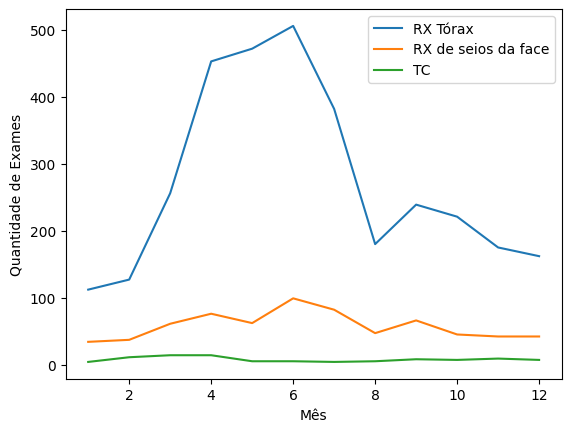

(    Mês  RX Tórax  RX de seios da face  TC  Atendimentos
 0     1       112                   34   4          2361
 1     2       127                   37  11          2661
 2     3       256                   61  14          3501
 3     4       453                   76  14          4463
 4     5       472                   62   5          3821
 5     6       506                   99   5          4287
 6     7       382                   82   4          4577
 7     8       180                   47   5          2442
 8     9       239                   66   8          4090
 9    10       221                   45   7          3790
 10   11       175                   42   9          3687
 11   12       162                   42   7          3829,
 None)

In [141]:
graficoDeLinha(tabela,'Mês')


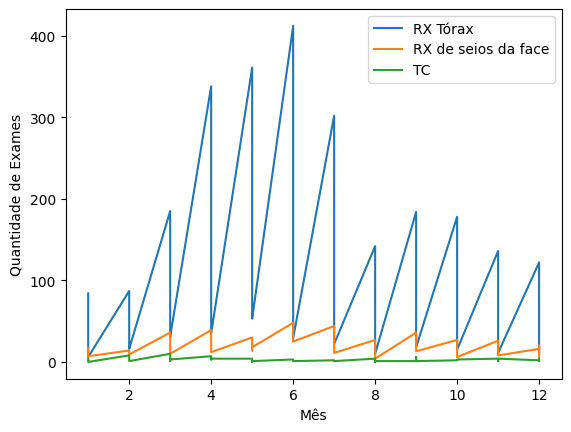

(    Mês Faixa etária  RX Tórax  RX de seios da face  TC  Atendimentos
 0     1     0-4 anos        84                   17   4          1398
 1     1     5-8 anos        22                   10   0           574
 2     1    9-12 anos         6                    7   0           389
 3     2     0-4 anos        87                   14   8          1666
 4     2     5-8 anos        24                   14   2           605
 5     2    9-12 anos        16                    9   1           390
 6     3     0-4 anos       185                   36  10          2228
 7     3     5-8 anos        40                   15   1           754
 8     3    9-12 anos        31                   10   3           519
 9     4     0-4 anos       338                   39   7          2803
 10    4     5-8 anos        80                   25   3          1032
 11    4    9-12 anos        35                   12   4           628
 12    5     0-4 anos       361                   30   4          2407
 13   

In [142]:
graficoDeLinha(tabela,['Mês','Faixa etária'])